In [ ]:
!pip install seaborn
!pip install matplotlib
!pip install pandas


### Dokumentacje linki
https://seaborn.pydata.org/generated/seaborn.barplot.html
https://seaborn.pydata.org/generated/seaborn.boxplot.html
https://seaborn.pydata.org/generated/seaborn.heatmap.html
https://seaborn.pydata.org/generated/seaborn.scatterplot.html
https://www.w3schools.com/python/pandas/default.asp
https://pandas.pydata.org/docs/
https://seaborn.pydata.org/generated/seaborn.load_dataset.html


*🎯 Cel zadania *

Celem zadania jest przeprowadzenie analizy zestawu danych "tips", który zawiera szczegółowe informacje o rachunkach i napiwkach w restauracji. Dzięki statystyce i wizualizacji odkryjemy, jak różne czynniki, takie jak dzień tygodnia, płeć klienta wpływają na wysokość rachunku i napiwku.

 **Krok 1** Sprawdzenie struktury danych

Zanim przejdziemy do analizy, zaczniemy od lepszego zrozumienia struktury danych. Po załadowaniu danych wczytajmy:

- Typy danych oraz ewentualne brakujące wartości za pomocą tips.info().
Statystyki opisowe, takie jak średnia, odchylenie standardowe.

- Unikalne wartości dla kolumny day, aby zobaczyć, które dni tygodnia są reprezentowane w danych.
------------------------------------
💡 Podpowiedź:

Użyj tips.info(), aby zobaczyć typy kolumn i brakujące dane.
Użyj tips.describe(), aby poznać statystyki opisowe.
Użyj tips['day'].unique(), aby wyświetlić unikalne dni tygodnia.

In [ ]:
import seaborn as sns

tips=sns.load_dataset('tips')
print(tips.head())
print(tips.describe())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


W następnym kroku przeanalizujemy zależność między rachunkiem a napiwkiem. Wykres rozrzutu (scatter plot) pokaże nam czy istnieje zależność między większym rachunkiem a większym napiwkiem.

Pytanie: Czy większy rachunek zwykle oznacza większy napiwek? Jakie dni tygodnia wydają się mieć wyższe rachunki lub napiwki?

💡 Podpowiedź: Możesz dodać kolory (hue) według day lub sex, aby zobaczyć różnice.

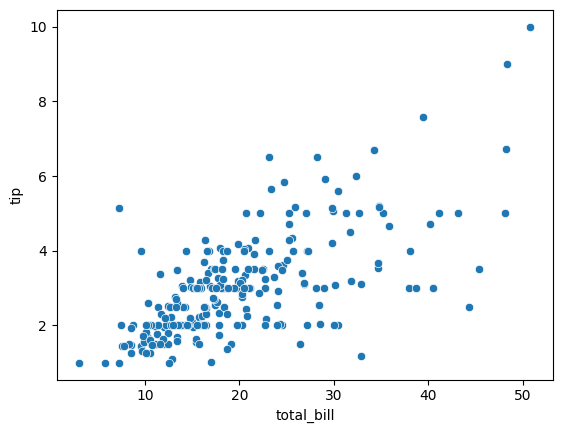

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.show()

📊 Analiza Rachunków w Zależności od Dnia Tygodnia

🗓️ Krok 1: Średni Rachunek dla Każdego Dnia Tygodnia Najpierw utworzymy wykres słupkowy (bar plot), który pokaże średnie wartości rachunków dla każdego dnia tygodnia. W tym wykresie:

💡 Podpowiedź: Dodanie hue='sex' 🎨 podkreśli różnice w rachunkach między mężczyznami a kobietami. Używamy tutaj pakietu biblioteki sns.barplot().

❓ Pytanie: Który dzień tygodnia ma najwyższe średnie rachunki? Czy weekend przyciąga większe wydatki, czy może dni robocze? Różnice w kolorach (płeć) również mogą pokazać ciekawe wzorce.

<ipython-input-15-d0bd407a9104>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day", y="total_bill", data=tips, palette='muted')


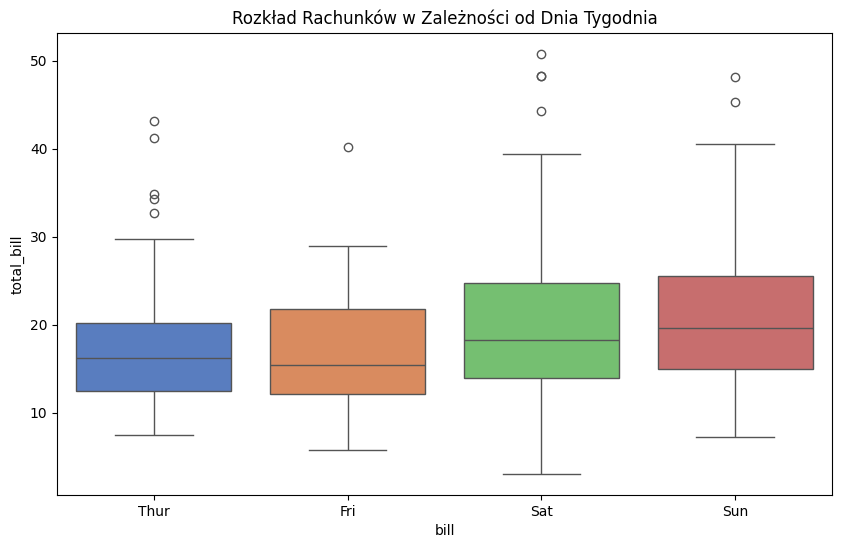

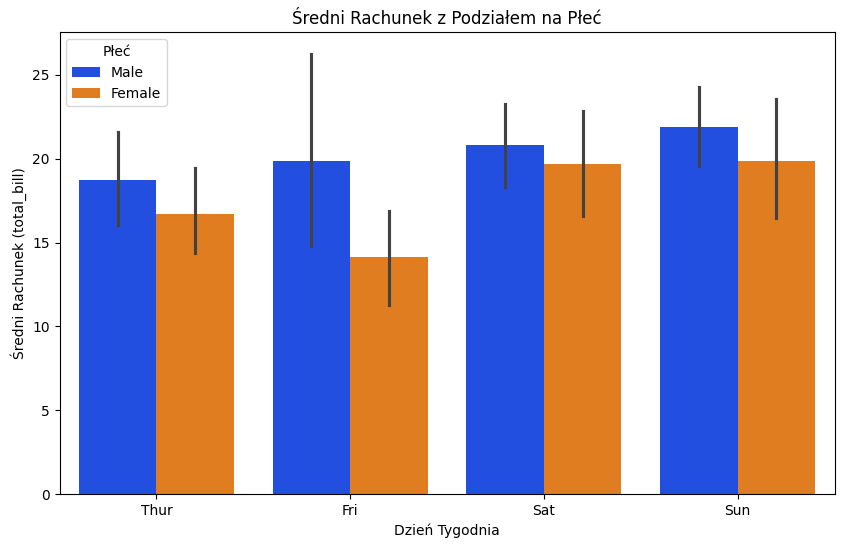

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x="day", y="total_bill", data=tips, palette='muted')
plt.title("Rozkład Rachunków w Zależności od Dnia Tygodnia")
plt.xlabel("bill")
plt.ylabel("total_bill")
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x="day", y="total_bill", data=tips, hue="sex", palette="bright")
plt.title("Średni Rachunek z Podziałem na Płeć")
plt.xlabel("Dzień Tygodnia")
plt.ylabel("Średni Rachunek (total_bill)")
plt.legend(title="Płeć")
plt.show()

📊 Heatmap

W tym zadaniu zbadamy korelacje między zmiennymi numerycznymi w zestawie danych "tips" i zbadamy jak zmienne są ze sobą powiązane.

1.Zaczniemy od wyznaczenia korelacji między kolumnami total_bill, tip, i size (rozmiar grupy) za pomocą funkcji corr().

2.Następnie stworzymy heatmap wykorzystamy przy tym pakiet sns.heatmap() z opcją annot=True, aby wyświetlić wartości liczbowych korelacji na wykresie.

💡 Podpowiedź: Wartości korelacji wahają się od -1 (silna korelacja ujemna) do 1 (silna korelacja dodatnia). Wartość bliska 0 oznacza brak korelacji.

<Axes: >

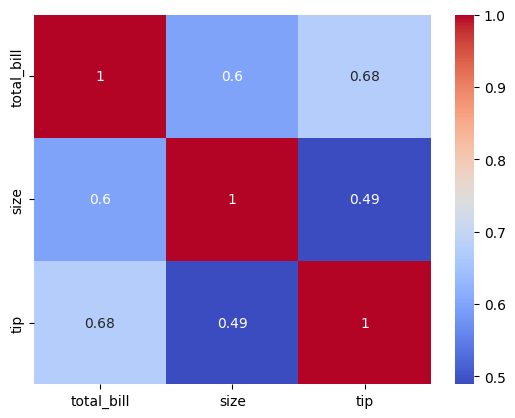

In [ ]:
import matplotlib.pyplot as plt
corr=tips[['total_bill', 'size', 'tip']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


📊 Mediana Napiwków dla Każdego Dnia Tygodnia (Dla chętnych w ramach przetestowania swoich umiejetności)

Dlaczego warto stosować medianę?

Mediana jest miarą centralną, która jest bardziej odporna na wartości odstające niż średnia.

Kroki działania :

Grupowanie danych według dnia tygodnia: Użyjemy funkcji groupby(), aby pogrupować dane według kolumny day.

Wyliczenie mediany napiwków: Na wyniku grupowania zastosujemy funkcję median().

Wizualizacja wyników za pomocą wykresu słupkowego (bar plot).

💡 Podpowiedź: Użyj groupby('day')['tip'].median(), aby najpierw pogrupować dane według kolumny day, a następnie obliczyć medianę dla kolumny tip

<ipython-input-16-915e5477983d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_median_tip = tips.groupby('day')['tip'].median().reset_index()


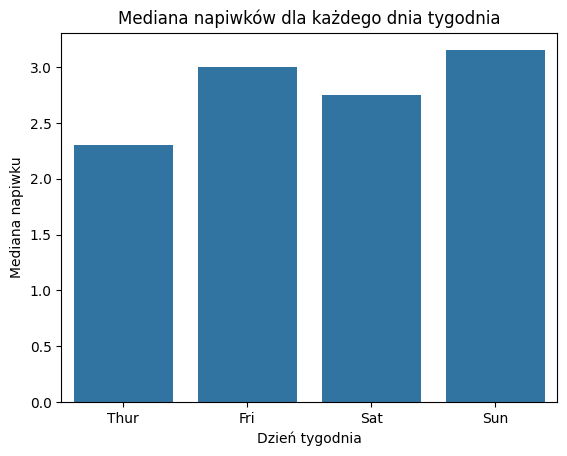

In [ ]:
tips_median_tip = tips.groupby('day')['tip'].median().reset_index()
sns.barplot(data=tips_median_tip, x='day', y='tip')
plt.title("Mediana napiwków dla każdego dnia tygodnia")
plt.xlabel("Dzień tygodnia")
plt.ylabel("Mediana napiwku")
plt.show()

In [ ]:
!pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 77.6 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=7d21b42620677a5b6004a0346a3e87afa4a1ccef7d33ebe071a4d62494919571
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


import openml
import pandas as pd
import matplotlib.pyplot as plt


dataset_id = 43566
data = openml.datasets.get_dataset(dataset_id)
df, *_ = data.get_data()

In [ ]:
import openml
import pandas as pd
import matplotlib.pyplot as plt


dataset_id = 43566
data = openml.datasets.get_dataset(dataset_id)
df, *_ = data.get_data()

print(df.head())
print(df.describe())

   Fide_id                 Name Federation Gender  Year_of_birth Title  \
0  1503014      Carlsen, Magnus        NOR      M         1990.0    GM   
1  2020009     Caruana, Fabiano        USA      M         1992.0    GM   
2  4100018      Kasparov, Garry        RUS      M         1963.0    GM   
3  8603677          Ding, Liren        CHN      M         1992.0    GM   
4  4168119  Nepomniachtchi, Ian        RUS      M         1990.0    GM   

   Standard_Rating  Rapid_rating  Blitz_rating Inactive_flag  
0           2863.0        2881.0        2886.0          None  
1           2835.0        2773.0        2711.0          None  
2           2812.0        2783.0        2801.0             i  
3           2791.0        2836.0        2788.0          None  
4           2784.0        2778.0        2785.0          None  
            Fide_id  Year_of_birth  Standard_Rating   Rapid_rating  \
count  9.776870e+05  943585.000000    363294.000000  193348.000000   
mean   2.919621e+07    1989.365212   

# 📊 Analiza Aktywnych Graczy i Federacji 🌎

### Opis Zadania
W tej analizie przeprowadzimy kroki, aby zbadać liczbę aktywnych graczy, reprezentowane federacje oraz średnie rankingi graczy.

---

#### 📌 Krok 1: Obliczenie Liczby Aktywnych Graczy
Najpierw zidentyfikujemy liczbę aktywnych graczy w zbiorze danych. Kolumna `Inactive_flag` wskazuje, czy gracz jest aktywny – jeśli wartość w tej kolumnie jest pusta (`NaN`), oznacza to, że gracz jest aktywny.

- **Cel**: Policz wszystkich aktywnych graczy w zbiorze danych.

#### 📌 Krok 2: Liczba Unikalnych Federacji
Następnie określimy, ile różnych federacji (krajów/regionów) jest reprezentowanych przez graczy.

- **Cel**: Użyj metody `nunique()` na kolumnie `Federation`, aby policzyć liczbę unikalnych federacji.

#### 📌 Krok 3: Liczba Aktywnych Graczy w Każdej Federacji
W kolejnym kroku sprawdzimy liczbę aktywnych graczy w każdej federacji.

- **Cel**: Wybierz tylko aktywnych graczy, a następnie użyj `groupby('Federation').size()` na kolumnie `Federation`, aby uzyskać liczbę aktywnych graczy w każdej federacji.

#### 📌 Krok 4: Średni Ranking Aktywnych Graczy w Każdej Federacji
Na koniec obliczymy średni standardowy ranking (`Standard_Rating`) aktywnych graczy w każdej federacji.

- **Cel**: Filtruj aktywnych graczy, a następnie użyj `groupby('Federation')` i oblicz średnią wartość w kolumnie `Standard_Rating`.


In [ ]:
import pandas as pd

# Zakładamy, że NaN w 'Inactive_flag' oznacza aktywnego gracza
active=df['Inactive_flag'].isna().sum()
print('Liczba aktywnych graczy')
print(active)

Liczba aktywnych graczy
764494


In [ ]:
fedarations=df['Federation'].nunique()
print("Liczba federacji", fedarations)

Liczba federacji 198


In [ ]:


# Zakładamy, że NaN w 'Inactive_flag' oznacza aktywnego gracza
active=df[df['Inactive_flag'].isna()].groupby('Federation')['Standard_Rating'].size()
print("\nLiczba aktywnych graczy w każdej federacji:")
print(active)



Liczba aktywnych graczy w każdej federacji:
Federation
AFG     195
AHO     186
ALB     478
ALG    3875
AND     121
       ... 
VIE    2125
WLS     386
YEM     371
ZAM    1748
ZIM     908
Name: Standard_Rating, Length: 198, dtype: int64


Federation
AFG    1982.0
AHO    2229.0
ALB    2527.0
ALG    2500.0
AND    2466.0
        ...  
VIE    2709.0
WLS    2271.0
YEM    1391.0
ZAM    2406.0
ZIM    2377.0
Name: Standard_Rating, Length: 198, dtype: float64


In [ ]:

average_rating_by_federation = df[df['Inactive_flag'].isna()].groupby('Federation')['Standard_Rating'].mean()
print("\nŚredni ranking aktywnych graczy w każdej federacji:")
print(average_rating_by_federation)



Średni ranking aktywnych graczy w każdej federacji:
Federation
AFG    1615.523810
AHO    1661.772727
ALB    1772.238095
ALG    1593.455526
AND    1836.000000
          ...     
VIE    1726.776596
WLS    1801.337662
YEM    1298.000000
ZAM    1781.379182
ZIM    1680.348214
Name: Standard_Rating, Length: 198, dtype: float64


# 📊 Analiza Rankingów Szachowych


#### 🎯 Zadanie 1: Top 5 Graczy z Najwyższym Rankingiem Rapid
- **Opis Zadania**: Znajdź pięciu zawodników z najwyższym rankingiem w kategorii Rapid, aby odkryć, kto dominuje w szybkim tempie gry.

Jak nazywa się zawodnik z najwyższym wynikiem i z jakiej jest federacji?

---

#### 👑 Zadanie 2: Najwyższy Ranking Standardowy dla Każdego Tytułu
- **Opis Zadania**: Znajdź najwyższy ranking standardowy dla każdego tytułu (`GM`, `IM`, `FM`, itp.) i sprawdź, którzy gracze wyróżniają się w swojej kategorii tytułowej.

Na podstawie uzyskanych wskaż najważniejszy tytuł szachowy? Czy średnie wyniki w danych kategoriach różnią się znacząco?

---

####🏅 Zadanie 3: Top 5 Graczy z Najwyższym Rankingiem Blitz
- **Opis Zadania**: Znajdź pięciu najlepszych graczy w kategorii Blitz.

Skąd pochodzą Ci zawodnicy i jaki wynik osiągnął lider w tym rankingu?


In [ ]:
top_5_rapid_players = df.sort_values(by='Rapid_rating', ascending=False).head(5)
print("\nTop 5 graczy z najwyższym rankingiem Rapid:")
print(top_5_rapid_players[['Name', 'Federation', 'Rapid_rating']])


Top 5 graczy z najwyższym rankingiem Rapid:
                       Name Federation  Rapid_rating
0           Carlsen, Magnus        NOR        2881.0
5   Vachier-Lagrave, Maxime        FRA        2860.0
3               Ding, Liren        CHN        2836.0
19         Nakamura, Hikaru        USA        2829.0
43           Korobov, Anton        UKR        2794.0


In [ ]:
max_standard_rating_by_title = df.groupby('Title')['Standard_Rating'].max()
print("\nNajwyższy ranking standardowy dla każdego tytułu:")
print(max_standard_rating_by_title)



Najwyższy ranking standardowy dla każdego tytułu:
Title
CM     2376.0
FM     2633.0
GM     2863.0
IM     2685.0
WCM    2189.0
WFM    2373.0
WGM    2491.0
WH     2080.0
WIM    2354.0
Name: Standard_Rating, dtype: float64


In [ ]:
#blitz ranking
top_5_player=df.sort_values(by='Blitz_rating', ascending=False).head(5)
print(top_5_player[['Name', 'Federation','Title']])

                       Name Federation Title
19         Nakamura, Hikaru        USA    GM
0           Carlsen, Magnus        NOR    GM
5   Vachier-Lagrave, Maxime        FRA    GM
8                So, Wesley        USA    GM
34               Yu, Yangyi        CHN    GM


In [ ]:
#rozwiązanie od Wojtka
top_5_player=df.groupby('Title').apply(lambda x: x.sort_values('Standard_Rating', ascending=False).head(4))
print(top_5_player)

              Fide_id                            Name Federation Gender  \
Title                                                                     
CM    4095   35062352                      Shahil Dey        IND      M   
      5193   25033638                  Kushagra Mohan        IND      M   
      5345     327646                 Balacek, Tadeas        CZE      M   
      5491   12401404                  Tran, Thanh Tu        JPN      M   
FM    145     4157770              Afromeev, Vladimir        RUS      M   
      532     4151119          Nechepurenko, Roman V.        RUS      M   
      626     4152786              Kozhakin, Vladimir        RUS      M   
      727    24176460                Sorokin, Aleksey        RUS      M   
GM    0       1503014                 Carlsen, Magnus        NOR      M   
      1       2020009                Caruana, Fabiano        USA      M   
      2       4100018                 Kasparov, Garry        RUS      M   
      3       8603677    

<ipython-input-70-36326996b00b>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_player=df.groupby('Title').apply(lambda x: x.sort_values('Standard_Rating', ascending=False).head(4))


# 📊 Wykres Słupkowy Liczby Aktywnych Graczy w Top 10 Federacjach Szachowych 🌍🏆

### 🎯 Cel Zadania 5
Celem tej analizy jest stworzenie wykresu słupkowego 📊 przedstawiającego liczbę aktywnych graczy 🧑‍💻👩‍💻 w 10 federacjach szachowych z największą liczbą aktywnych zawodników. Wykres pomoże zidentyfikować federacje z najliczniejszymi reprezentacjami wśród aktywnych graczy, co jest istotne dla analizy rozkładu popularności szachów na świecie 🌎.

---

### 🔧 Instrukcje

#### ✅ Krok 1: Filtracja aktywnych graczy 🔍
1. **Filtracja**: Uwzględniamy tylko aktywnych graczy, dla których kolumna `Inactive_flag` jest pusta (`NaN`), aby skupić się na zawodnikach obecnie aktywnych w federacjach.

#### 📈 Krok 2: Zliczanie aktywnych graczy na federację 🧮
1. **Grupowanie**: Zliczamy liczbę aktywnych graczy w każdej federacji, korzystając z metody `value_counts()`, aby każda federacja miała przypisaną liczbę swoich aktywnych zawodników.

#### 🔝 Krok 3: Wybór Top 10 federacji
1. **Sortowanie i wybór**: Sortujemy federacje według liczby aktywnych graczy i wybieramy top 10 federacji z największą liczbą zawodników, korzystając z `sort_values` oraz `head()`.

#### 📊 Krok 4: Tworzenie wykresu słupkowego
1. **Wizualizacja**: Używamy biblioteki `seaborn` do stworzenia wykresu słupkowego, który pokazuje liczbę aktywnych graczy w wybranych federacjach. Dodajemy rotację etykiet osi X (np. 45 stopni) oraz ustawiamy tytuł wykresu i opisy osi.

---


<ipython-input-92-9c37504d0521>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Federation', y='Active_Players', palette='coolwarm')


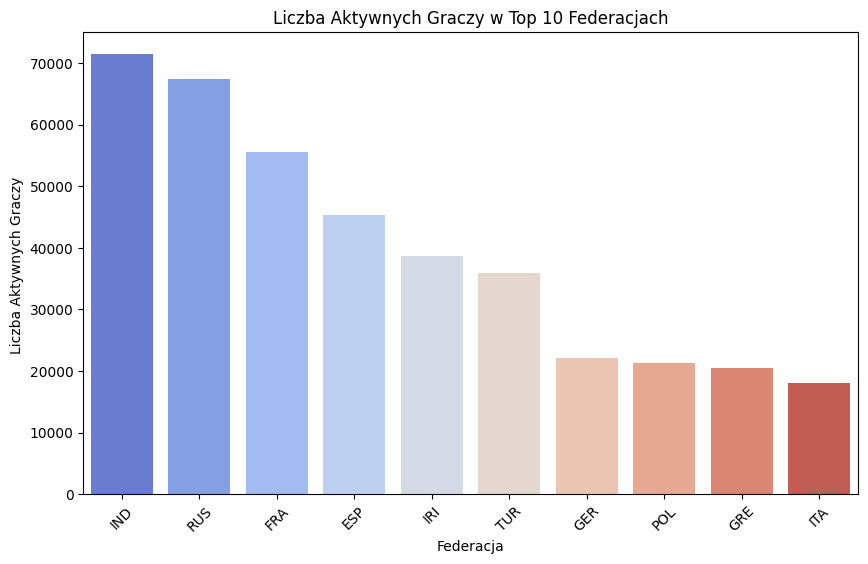

In [ ]:
import matplotlib.pyplot as plt
active=df[df['Inactive_flag'].isna()].groupby('Federation').size().reset_index(name='Active_Players')
top10=active.sort_values('Active_Players', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='Federation', y='Active_Players', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Liczba Aktywnych Graczy w Top 10 Federacjach")
plt.xlabel("Federacja")
plt.ylabel("Liczba Aktywnych Graczy ")
plt.show()


# 📊 Analiza Rankingów Rapid dla Aktywnych Graczy według Tytułu i Płci

### 🎯 Cel Zadania
Celem tej analizy jest zbadanie, jak rankingi Rapid różnią się między graczami o różnych tytułach oraz płci, wśród aktywnych zawodników. Chcemy zobaczyć, czy poziom gry (określony przez ranking Rapid) koreluje z tytułem zawodnika oraz czy występują różnice pomiędzy rankingami mężczyzn i kobiet na poszczególnych poziomach.

---

### 🔧 Instrukcje

#### Krok 1: Przygotowanie danych 📈
1. **Filtracja aktywnych graczy**:
   - Uwzględniamy tylko aktywnych graczy, dla których `Inactive_flag` jest puste (`NaN`), aby skoncentrować się na zawodnikach obecnie uczestniczących w rozgrywkach.
   
2. **Selekcja kolumn**:
   - Dane powinny zawierać kolumny `Title` (tytuł gracza), `Gender` (płeć) oraz `Rapid_Rating` (ranking Rapid). Usuwamy wartości `NaN` z kolumny `Rapid_Rating`, aby uniknąć błędów przy wizualizacji.

#### Krok 2: Tworzenie Wykresu Pudełkowego
 **Wizualizacja zależności między tytułem, płcią a rankingiem**:
   - Korzystamy z `seaborn.boxplot`, aby stworzyć wykres pudełkowy, pokazujący rozkład rankingów Rapid według tytułów i płci.
   - Parametr `hue='Gender'` pozwala rozróżnić rankingi mężczyzn i kobiet w ramach każdego tytułu, co umożliwia wizualne porównanie.

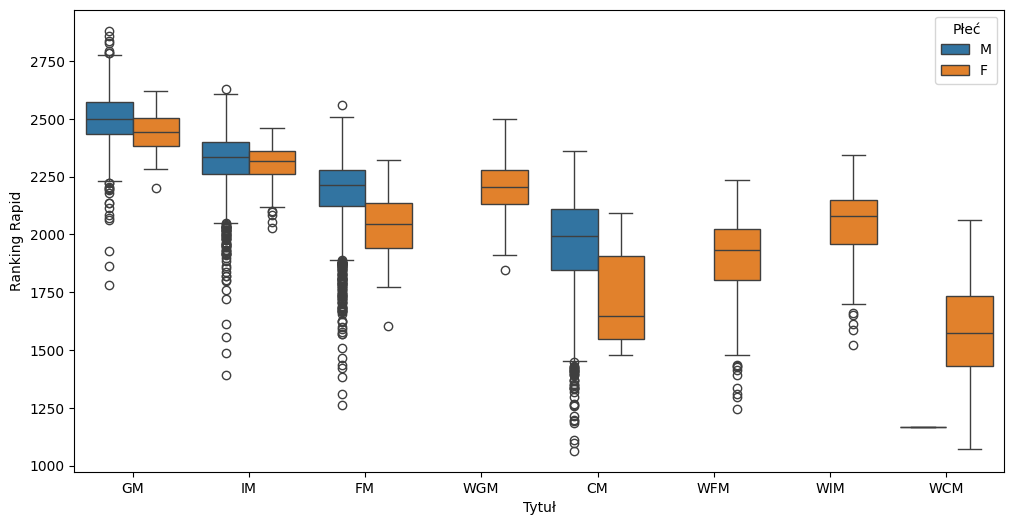

In [ ]:
active=df[df['Inactive_flag'].isna()]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Title',y='Rapid_rating', hue='Gender', data=active)
plt.xlabel("Tytuł")
plt.ylabel("Ranking Rapid")
plt.legend(title="Płeć")
plt.show()

